In [1]:
from collect_data import *
from collect_metrics import *
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df_stft = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_.csv')
df_clip = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_text_clip_.csv')
df_gpt = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_text_gpt_.csv')
df_w2v = pd.read_csv('/data01/data/MEG/collect_data/results/csv_subj_bands/csv_ridge_w2v_.csv')

df_stft_nfft = pd.read_csv('/srv/nfs-data/sisko/matteoc/meg/audio_stft/csv_ridge_stft_nfft.csv')

In [3]:
df_stft_nfft

,Subject,Band,Channel,pearson_corr,modified_r2,mse,mae,mae_norm,nmi
0,subject_01,complete,0,0.014253,2.031453e-04,53.275677,5.504869,0.272611,0.0
1,subject_01,complete,1,0.005768,3.326987e-05,61.281883,5.664221,0.281286,0.0
2,subject_01,complete,2,0.000749,5.610896e-07,50.750877,5.456228,0.302849,0.0
3,subject_01,complete,3,0.004327,1.871932e-05,62.091166,5.739815,0.292707,0.0
4,subject_01,complete,4,0.006047,3.656785e-05,55.140382,5.557646,0.296963,0.0
...,...,...,...,...,...,...,...,...,...
8315,subject_09,beta,203,0.002547,6.485416e-06,59.774078,5.771685,0.262549,0.0
8316,subject_09,beta,204,-0.009970,-9.940948e-05,55.272064,5.700511,0.280287,0.0
8317,subject_09,beta,205,-0.005498,-3.022322e-05,67.360884,6.026263,0.279420,0.0
8318,subject_09,beta,206,-0.011010,-1.212187e-04,62.518606,5.945327,0.269208,0.0


In [4]:
null_distr_clip = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_pc_100_ridge_text_clip_.npy')
null_distr_stft = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_pc_100_ridge_.npy')
null_distr_gpt = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_pc_100_ridge_text_gpt_.npy')
null_distr_w2v = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_pc_100_ridge_w2v_.npy')

null_distr_stft_nfft = np.load('/data01/data/MEG/collect_data/results/null_distr/null_distr_pc_100_ridge_nfft.npy')


In [5]:
def get_mean_from_subjects_metrics(df, column, band):
    values_to_mean = []
    filtered_df = df[df['Band'] == band]
    
    for subject in filtered_df['Subject'].unique():
        subject_df = filtered_df[filtered_df['Subject'] == subject]
        get_values = torch.Tensor(subject_df[column].values)
        values_to_mean.append(get_values)
    
    mean_channels = torch.mean(torch.stack(values_to_mean), dim=0)
    return mean_channels




In [6]:
mean_r2_complete_subj_stft = get_mean_from_subjects_metrics(df_stft, "modified_r2", "complete")
mean_r2_complete_subj_w2v = get_mean_from_subjects_metrics(df_w2v, "modified_r2", "complete")
mean_r2_complete_subj_clip = get_mean_from_subjects_metrics(df_clip, "modified_r2", "complete")
mean_r2_complete_subj_gpt = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "complete")


In [7]:
mean_pc_complete_subj_stft = get_mean_from_subjects_metrics(df_stft, "pearson_corr", "complete")
mean_pc_complete_subj_w2v = get_mean_from_subjects_metrics(df_w2v, "pearson_corr", "complete")
mean_pc_complete_subj_clip = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "complete")
mean_pc_complete_subj_gpt = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "complete")

mean_pc_complete_subj_stft_nfft = get_mean_from_subjects_metrics(df_stft_nfft, "pearson_corr", "complete")

In [24]:
mean_r2_complete_subj = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "complete")
mean_r2_delta_subj = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "delta")
mean_r2_theta_subj = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "theta")
mean_r2_alpha_subj = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "alpha")
mean_r2_beta_subj = get_mean_from_subjects_metrics(df_gpt, "modified_r2", "beta")

mean_pc_complete_subj = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "complete")
mean_pc_delta_subj = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "delta")
mean_pc_theta_subj = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "theta")
mean_pc_alpha_subj = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "alpha")
mean_pc_beta_subj = get_mean_from_subjects_metrics(df_gpt, "pearson_corr", "beta")

print('-------------- PEARSON --------------')
print('COMPLETE_MEAN: ', "{:.7f}".format(mean_pc_complete_subj.mean()))
print('DELTA_MEAN: ', "{:.7f}".format(mean_pc_delta_subj.mean()))
print('THETA_MEAN: ', "{:.7f}".format(mean_pc_theta_subj.mean()))
print('ALPHA_MEAN: ', "{:.7f}".format(mean_pc_alpha_subj.mean()))
print('BETA_MEAN: ', "{:.7f}".format(mean_pc_beta_subj.mean()))
print('--------------------------------------')
print('COMPLETE_STD: ', "{:.7f}".format(mean_pc_complete_subj.std()))
print('DELTA_STD: ', "{:.7f}".format(mean_pc_delta_subj.std()))
print('THETA_STD: ', "{:.7f}".format(mean_pc_theta_subj.std()))
print('ALPHA_STD: ', "{:.7f}".format(mean_pc_alpha_subj.std()))
print('BETA_STD: ', "{:.7f}".format(mean_pc_beta_subj.std()))

print('---------------- R2 ----------------')
print('COMPLETE_MEAN: ', "{:.7f}".format(mean_r2_complete_subj.mean()))
print('DELTA_MEAN: ', "{:.7f}".format(mean_r2_delta_subj.mean()))
print('THETA_MEAN: ', "{:.7f}".format(mean_r2_theta_subj.mean()))
print('ALPHA_MEAN: ', "{:.7f}".format(mean_r2_alpha_subj.mean()))
print('BETA_MEAN: ', "{:.7f}".format(mean_r2_beta_subj.mean()))
print('--------------------------------------')
print('COMPLETE_STD: ', "{:.7f}".format(mean_r2_complete_subj.std()))
print('DELTA_STD: ', "{:.7f}".format(mean_r2_delta_subj.std()))
print('THETA_STD: ', "{:.7f}".format(mean_r2_theta_subj.std()))
print('ALPHA_STD: ', "{:.7f}".format(mean_r2_alpha_subj.std()))
print('BETA_STD: ', "{:.7f}".format(mean_r2_beta_subj.std()))

-------------- PEARSON --------------
COMPLETE_MEAN:  0.0061092
DELTA_MEAN:  0.0009803
THETA_MEAN:  0.0043785
ALPHA_MEAN:  0.0066535
BETA_MEAN:  0.0074522
--------------------------------------
COMPLETE_STD:  0.0053779
DELTA_STD:  0.0016699
THETA_STD:  0.0048639
ALPHA_STD:  0.0059567
BETA_STD:  0.0066129
---------------- R2 ----------------
COMPLETE_MEAN:  0.0001749
DELTA_MEAN:  0.0000070
THETA_MEAN:  0.0001052
ALPHA_MEAN:  0.0002190
BETA_MEAN:  0.0002697
--------------------------------------
COMPLETE_STD:  0.0002924
DELTA_STD:  0.0000140
THETA_STD:  0.0001842
ALPHA_STD:  0.0003121
BETA_STD:  0.0004840


In [9]:
mean_r2_complete_subj_tex = get_mean_from_subjects_metrics(df_clip, "modified_r2", "complete")
mean_r2_delta_subj_tex = get_mean_from_subjects_metrics(df_clip, "modified_r2", "delta")
mean_r2_theta_subj_tex = get_mean_from_subjects_metrics(df_clip, "modified_r2", "theta")
mean_r2_alpha_subj_tex = get_mean_from_subjects_metrics(df_clip, "modified_r2", "alpha")
mean_r2_beta_subj_tex = get_mean_from_subjects_metrics(df_clip, "modified_r2", "beta")

mean_pc_complete_subj_tex = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "complete")
mean_pc_delta_subj_tex = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "delta")
mean_pc_theta_subj_tex = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "theta")
mean_pc_alpha_subj_tex = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "alpha")
mean_pc_beta_subj_tex = get_mean_from_subjects_metrics(df_clip, "pearson_corr", "beta")

print('-------------- PEARSON --------------')
print('COMPLETE_MEAN: ', "{:.7f}".format(mean_pc_complete_subj_tex.mean()))
print('DELTA_MEAN: ', "{:.7f}".format(mean_pc_delta_subj_tex.mean()))
print('THETA_MEAN: ', "{:.7f}".format(mean_pc_theta_subj_tex.mean()))
print('ALPHA_MEAN: ', "{:.7f}".format(mean_pc_alpha_subj_tex.mean()))
print('BETA_MEAN: ', "{:.7f}".format(mean_pc_beta_subj_tex.mean()))
print('--------------------------------------')
print('COMPLETE_STD: ', "{:.7f}".format(mean_pc_complete_subj_tex.std()))
print('DELTA_STD: ', "{:.7f}".format(mean_pc_delta_subj_tex.std()))
print('THETA_STD: ', "{:.7f}".format(mean_pc_theta_subj_tex.std()))
print('ALPHA_STD: ', "{:.7f}".format(mean_pc_alpha_subj_tex.std()))
print('BETA_STD: ', "{:.7f}".format(mean_pc_beta_subj_tex.std()))

print('---------------- R2 ----------------')
print('COMPLETE_MEAN: ', "{:.7f}".format(mean_r2_complete_subj_tex.mean()))
print('DELTA_MEAN: ', "{:.7f}".format(mean_r2_delta_subj_tex.mean()))
print('THETA_MEAN: ', "{:.7f}".format(mean_r2_theta_subj_tex.mean()))
print('ALPHA_MEAN: ', "{:.7f}".format(mean_r2_alpha_subj_tex.mean()))
print('BETA_MEAN: ', "{:.7f}".format(mean_r2_beta_subj_tex.mean()))
print('--------------------------------------')
print('COMPLETE_STD: ', "{:.7f}".format(mean_r2_complete_subj_tex.std()))
print('DELTA_STD: ', "{:.7f}".format(mean_r2_delta_subj_tex.std()))
print('THETA_STD: ', "{:.7f}".format(mean_r2_theta_subj_tex.std()))
print('ALPHA_STD: ', "{:.7f}".format(mean_r2_alpha_subj_tex.std()))
print('BETA_STD: ', "{:.7f}".format(mean_r2_beta_subj_tex.std()))

-------------- PEARSON --------------
COMPLETE_MEAN:  0.0056044
DELTA_MEAN:  0.0013140
THETA_MEAN:  0.0015204
ALPHA_MEAN:  0.0091219
BETA_MEAN:  0.0062928
--------------------------------------
COMPLETE_STD:  0.0047989
DELTA_STD:  0.0017720
THETA_STD:  0.0046200
ALPHA_STD:  0.0051130
BETA_STD:  0.0062890
---------------- R2 ----------------
COMPLETE_MEAN:  0.0001874
DELTA_MEAN:  0.0000100
THETA_MEAN:  0.0000640
ALPHA_MEAN:  0.0003003
BETA_MEAN:  0.0002752
--------------------------------------
COMPLETE_STD:  0.0003188
DELTA_STD:  0.0000150
THETA_STD:  0.0001559
ALPHA_STD:  0.0003123
BETA_STD:  0.0005506


## Audio - Testo

Reading 0 ... 395999  =      0.000 ...   395.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:51: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


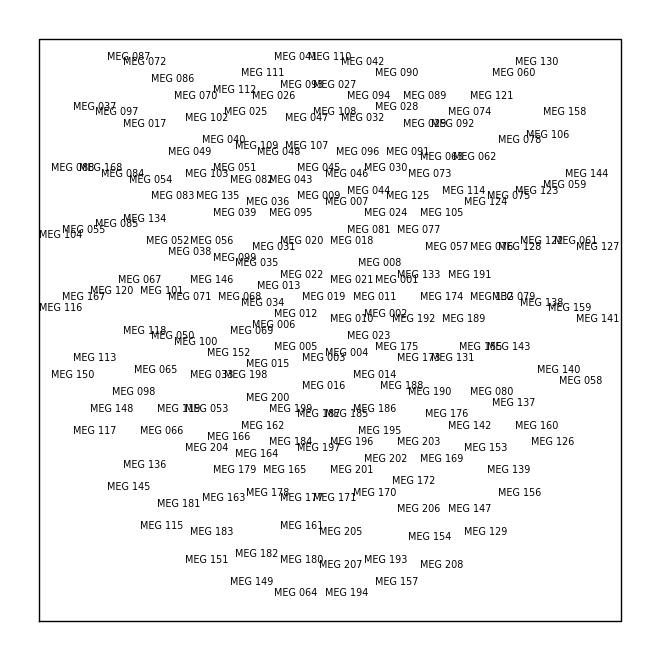

Figure(640x640)


In [19]:
raw = get_bids_raw(meg_path, patient[0], session[0], '0')
layout_from_raw = mne.channels.find_layout(raw.info, ch_type='mag')
print(layout_from_raw.plot())

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


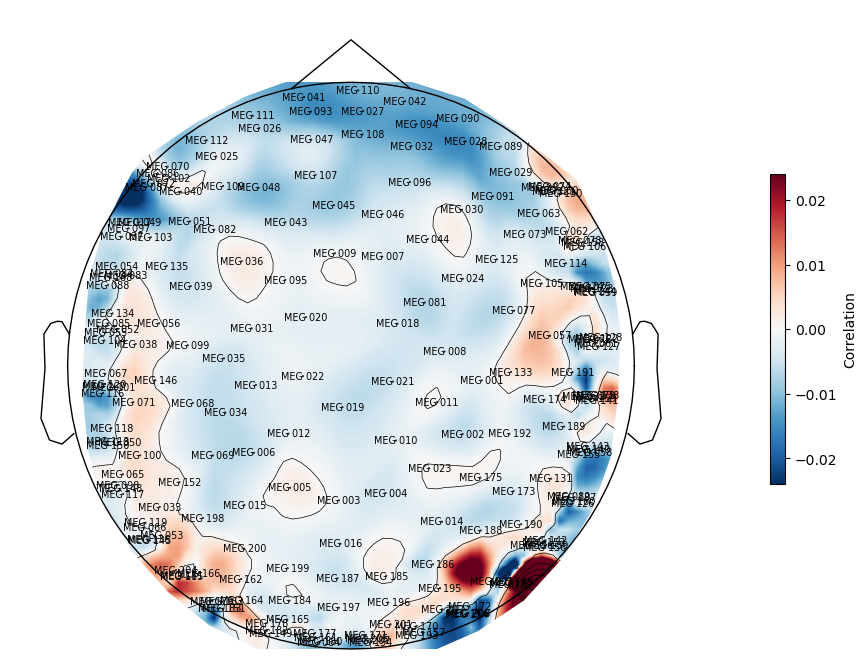

In [25]:
get_topomap(raw, mean_pc_complete_subj - mean_pc_complete_subj_tex, (-0.024, 0.024)) 

## Topomaps Z score

In [25]:
null_distr_clip_mean = np.mean(null_distr_clip, 0)
null_distr_stft_mean = np.mean(null_distr_stft[0:-1], 0)
null_distr_gpt_mean = np.mean(null_distr_gpt, 0)
null_distr_w2v_mean = np.mean(null_distr_w2v[0:-1], 0)

null_distr_stft_nfft_mean = np.mean(null_distr_stft_nfft, 0)

In [26]:
null_distr_stft_nfft_mean.shape

(208, 100)

In [27]:
from scipy.stats import ttest_ind, ttest_1samp
from scipy.stats import t as t_stud
from statsmodels.stats.multitest import multipletests

z_models = []
t_values = []
pval_models = []
null_distr_model = [null_distr_stft_nfft_mean, null_distr_w2v_mean, null_distr_clip_mean, null_distr_gpt_mean]
df_model_complete_subj = [mean_pc_complete_subj_stft_nfft, mean_pc_complete_subj_w2v, mean_pc_complete_subj_clip, mean_pc_complete_subj_gpt]
for mod in range(num_models):
    z = []
    t_v = []
    pval = []
    for i in range(num_channel):

        media = null_distr_model[mod][i,:].mean()
        devstd = null_distr_model[mod][i,:].std()

        t_rev, p = ttest_1samp(null_distr_model[mod][i,:], popmean=df_model_complete_subj[mod][i])
        # t_hand = float((df_model_complete_subj[mod][i] - media)/(devstd / np.sqrt(len(null_distr_model[mod][i,:]))))
        # t_rev = t_stud.ppf(1 - (p + 1e-8) / 2, len(null_distr_model[mod][i,:])-1)
        t_hand = float((df_model_complete_subj[mod][i] - media)/(devstd))
        z.append(t_hand)
        t_v.append(-t_rev)
        pval.append(p)
    z_models.append(z)
    t_values.append(t_v)
    pval_models.append(pval)



In [28]:
choose_model = 3
z_threshold = 4.5

print('Z score higher than threshold: ', np.where(np.array(z_models[choose_model])>z_threshold)[0].shape)

Z score higher than threshold:  (144,)


In [29]:
print('-------- Z SCORE ---------')
print(np.min(z_models[choose_model]))
print(np.max(z_models[choose_model]))
print('-----------------')
print(np.mean(z_models[choose_model]))    
print(np.std(z_models[choose_model]))

print('-------- T SCORE ---------')
print(np.min(t_values[choose_model]))
print(np.max(t_values[choose_model]))
print('-----------------')
print(np.mean(t_values[choose_model]))    
print(np.std(t_values[choose_model]))

print('-------- P VALUE ---------')
print(np.min(pval_models[choose_model]))
print(np.max(pval_models[choose_model]))
print('-----------------')
print(np.mean(pval_models[choose_model]))    
print(np.std(pval_models[choose_model]))

-------- Z SCORE ---------
-6.361164569854736
19.552881240844727
-----------------
6.296901783883536
4.331961362415765
-------- T SCORE ---------
-63.2927922861356
194.54870183978454
-----------------
62.65338200058664
43.10247161968019
-------- P VALUE ---------
1.0412665916298005e-129
0.8879472553141308
-----------------
0.0062279126016329825
0.06337428884433


Reading 0 ... 395999  =      0.000 ...   395.999 secs...


/home/matteoc/spect-to-meg/code/collect_data.py:59: RuntimeWarning: The unit for channel(s) MISC 001, MISC 002, MISC 003, MISC 004, MISC 005, MISC 006, MISC 007, MISC 008, MISC 009, MISC 010, MISC 011, MISC 012, MISC 013, MISC 014, MISC 015, MISC 016, MISC 017, MISC 018, MISC 019, MISC 020, MISC 021, MISC 022, MISC 023, MISC 024, MISC 025, MISC 026, MISC 027, MISC 028, MISC 029, MISC 030, MISC 031, MISC 032 has changed from V to NA.
  raw = mne_bids.read_raw_bids(bids_path, verbose=False)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 6601 samples (6.601 s)

NOTE: pick_types() is a legacy function. New code should use inst.pick(...).


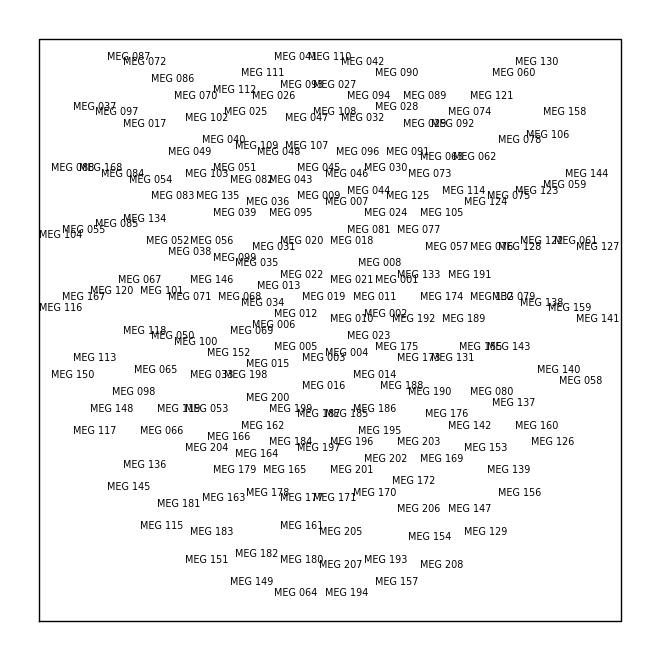

Figure(640x640)


In [30]:
raw = get_bids_raw(meg_path, patient[0], session[0], '0')
layout_from_raw = mne.channels.find_layout(raw.info, ch_type='mag')
print(layout_from_raw.plot())

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


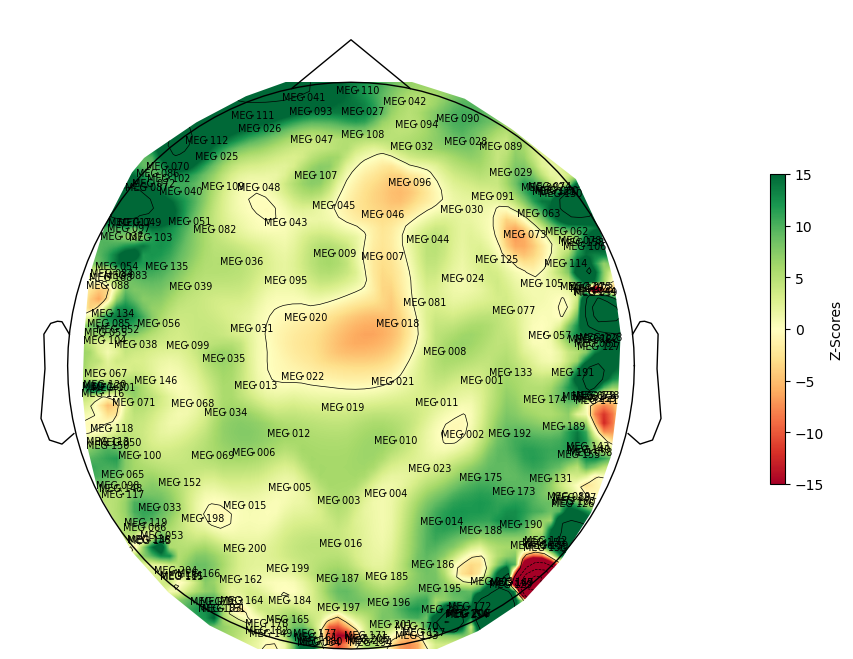

In [31]:
correlations = get_topomap(raw, z_models[choose_model], (-15, 15), threshold=None,
            image_interp='cubic', cmap='RdYlGn', label_to_set='Z-Scores')  # RdYlGn_r

## Violinplot

In [32]:
null_distr_clip_mean = np.mean(null_distr_clip, 1)
null_distr_stft_mean = np.mean(null_distr_stft, 1)
null_distr_gpt_mean = np.mean(null_distr_gpt, 1)
null_distr_w2v_mean = np.mean(null_distr_w2v, 1)

null_distr_stft_nfft_mean = np.mean(null_distr_stft_nfft, 1)


def get_mean_from_channels_metrics(df, column, band):
    values_to_mean = []
    filtered_df = df[df['Band'] == band]

    for channel in filtered_df['Channel'].unique():
        subject_df = filtered_df[filtered_df['Channel'] == channel]
        get_values = torch.Tensor(subject_df[column].values)
        values_to_mean.append(get_values)
    
    mean_channels = torch.mean(torch.stack(values_to_mean), dim=0)
    return mean_channels


mean_pc_complete_chann_stft_nfft = get_mean_from_channels_metrics(df_stft_nfft, "pearson_corr", "complete")
mean_pc_complete_chann_w2v = get_mean_from_channels_metrics(df_w2v, "pearson_corr", "complete")
mean_pc_complete_chann_clip = get_mean_from_channels_metrics(df_clip, "pearson_corr", "complete")
mean_pc_complete_chann_gpt = get_mean_from_channels_metrics(df_gpt, "pearson_corr", "complete")



In [33]:
null_distr_stft_nfft_mean.shape

(8, 100)

In [34]:
null_distr_clip_mean_sub = np.mean(null_distr_clip_mean, 0)
null_distr_stft_nftt_mean_sub = np.mean(null_distr_stft_nfft_mean, 0)
null_distr_gpt_mean_sub = np.mean(null_distr_gpt_mean, 0)
null_distr_w2v_mean_sub = np.mean(null_distr_w2v_mean, 0)

baseline_list = [null_distr_clip_mean_sub, null_distr_stft_nftt_mean_sub, null_distr_gpt_mean_sub, 
                    null_distr_w2v_mean_sub]

baseline_dist = []
for mod in range(num_models):
    baseline_mod = []
    for i in range(30):

        media = baseline_list[mod].mean()
        devstd = baseline_list[mod].std()
        t = float((baseline_list[mod][i] - media)/devstd)
        baseline_mod.append(t)
    baseline_dist.append(baseline_mod)

In [35]:
# from scipy.stats import t

z_models = []
# z_models_t = []
pval_models = []
null_distr_model = [null_distr_stft_nfft_mean, null_distr_w2v_mean, null_distr_clip_mean, null_distr_gpt_mean]
df_model_complete_chann = [mean_pc_complete_chann_stft_nfft, mean_pc_complete_chann_w2v, mean_pc_complete_chann_clip, mean_pc_complete_chann_gpt]
for mod in range(num_models):
    z = []
    z_t_nic = []
    pval = []
    for i in range(act_subjects):

        media = null_distr_model[mod][i,:].mean()
        devstd = null_distr_model[mod][i,:].std()

        t_st, p = ttest_1samp(null_distr_model[mod][i,:], popmean=df_model_complete_chann[mod][i])
        t_val = float((df_model_complete_chann[mod][i] - media)/devstd)
        # t_values = t.ppf(1 - (p + 1e-8) / 2, 28)
        # z_t_nic.append(t_values)
        z.append(t_val)
        pval.append(p)
    z_models.append(z)
    # z_models_t.append(z_t_nic)
    pval_models.append(pval)

In [36]:
choose_model = 3

print('-------- Z SCORE ---------')
print(np.min(z_models[choose_model]))
print(np.max(z_models[choose_model]))
print('-----------------')
print(np.mean(z_models[choose_model]))    
print(np.std(z_models[choose_model]))

print('-------- P VALUE ---------')
print(np.min(pval_models[choose_model]))
print(np.max(pval_models[choose_model]))
print('-----------------')
print(np.mean(pval_models[choose_model]))    
print(np.std(pval_models[choose_model]))

-------- Z SCORE ---------
-1.0263184309005737
16.275243759155273
-----------------
9.834806576371193
5.066740062669016
-------- P VALUE ---------
7.613697096576884e-122
3.778117774735891e-17
-----------------
4.722647218419864e-18
1.2494950069829896e-17


In [22]:
pval_models[choose_model]

[tensor(2.4630e-24, dtype=torch.float64),
 tensor(1.9308e-73, dtype=torch.float64),
 tensor(2.7833e-83, dtype=torch.float64),
 tensor(9.0757e-119, dtype=torch.float64),
 tensor(5.3967e-111, dtype=torch.float64),
 tensor(1.7516e-125, dtype=torch.float64),
 tensor(3.0679e-112, dtype=torch.float64),
 tensor(0.7313, dtype=torch.float64)]

In [23]:
z_models[choose_model]

[1.364428997039795,
 5.1949872970581055,
 -6.575006008148193,
 15.147085189819336,
 12.62968921661377,
 17.717517852783203,
 13.003108978271484,
 0.03460374101996422]

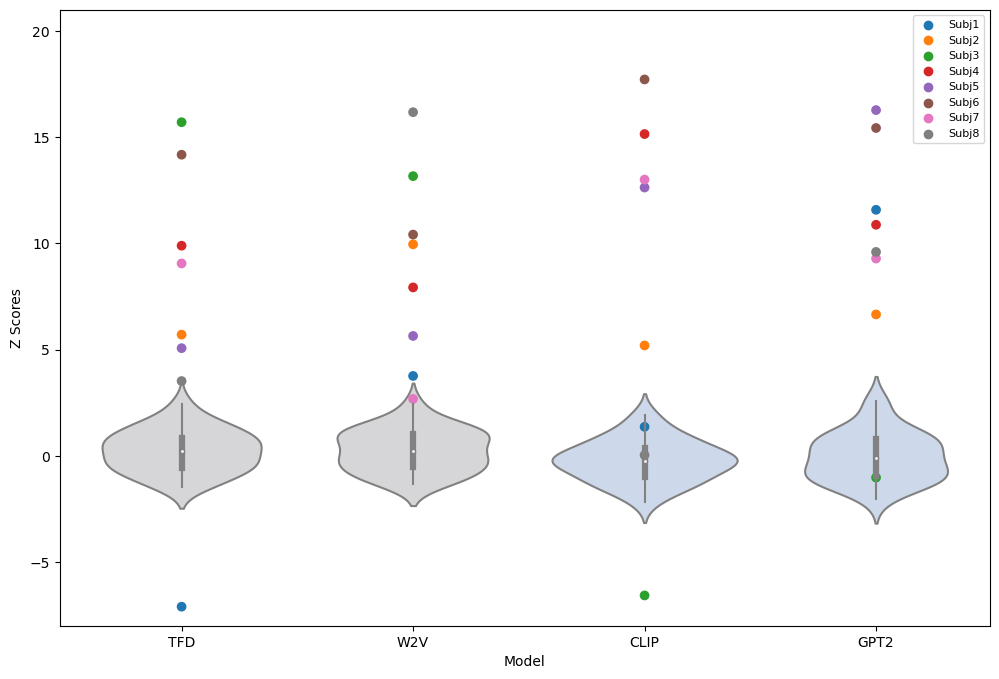

In [26]:
model_list = ['TFD', 'W2V', 'CLIP', 'GPT2']
all_null_distr = [val for sublist in baseline_dist for val in sublist]   
source_models = []
for i, sublist in enumerate(baseline_dist):
    source_models.extend([model_list[i]] * len(sublist))
data_zscore = {"Null Distr": all_null_distr, "Model": source_models}
df_zscore = pd.DataFrame(data_zscore)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b','#e377c2', '#7f7f7f']
labels = ['Subj1', 'Subj2', 'Subj3', 'Subj4', 'Subj5', 'Subj6','Subj7', 'Subj8']
violin_model_color = {'TFD': '#d6d6d8',
                        'W2V': '#d6d6d8',
                        'CLIP': '#c8d8ef',
                        'GPT2': '#c8d8ef'}

colors_tile = np.tile(colors, num_models)
x_offsets = np.arange(len(model_list))
x_offsets_rep = np.repeat(x_offsets, act_subjects)
fig, ax = plt.subplots(1, 1, figsize=(12, 8)) 
sns.violinplot(x="Model", y="Null Distr", data=df_zscore, ax=ax, palette=violin_model_color)
ax.scatter(x_offsets_rep, z_models, c=colors_tile)

for color, label in zip(colors, labels):
    ax.scatter([], [], c=color, label=label)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right', fontsize=8)

plt.xlabel("Model")
plt.ylabel("Z Scores")
plt.ylim(-8, 21)
plt.show()

## Topomaps R2

In [34]:
mean_r2_complete_subj_clip.max()

tensor(0.0037)

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


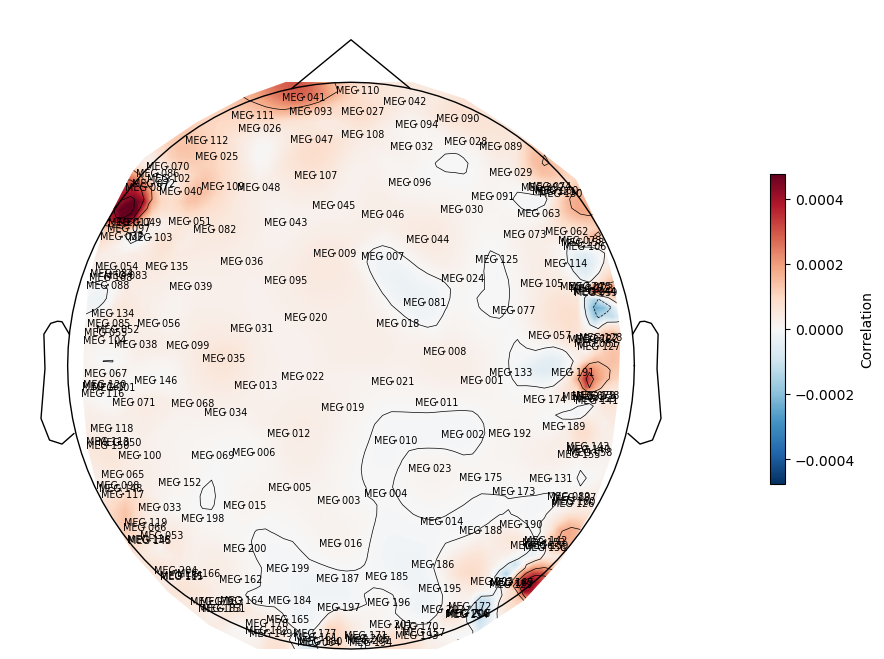

In [83]:
get_topomap(raw, get_mean_from_subjects_metrics(df_stft, "modified_r2", "complete"), (-0.000476, 0.000476)) 

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


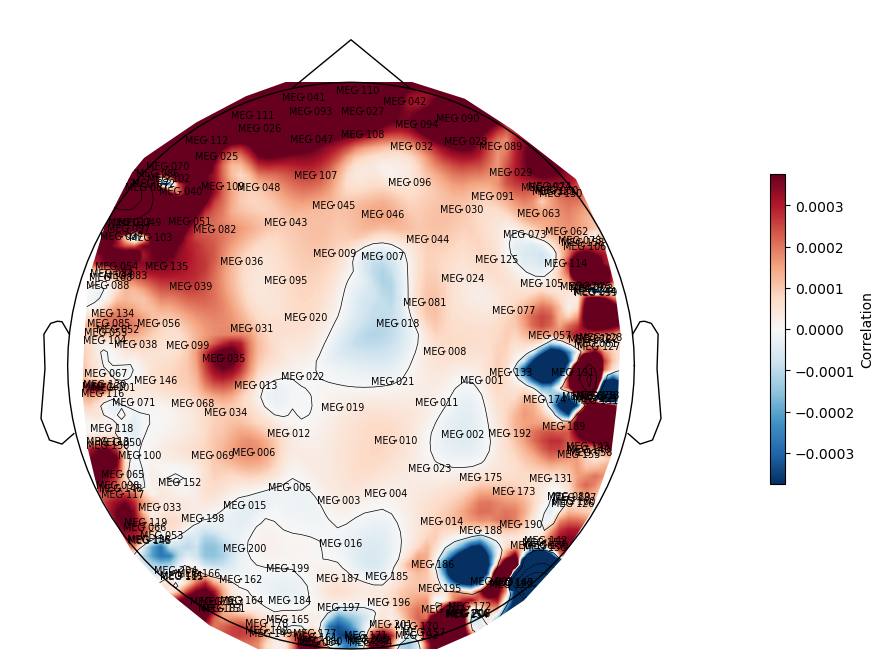

In [65]:
get_topomap(raw, mean_r2_complete_subj_gpt, (-0.000376, 0.000376)) 

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


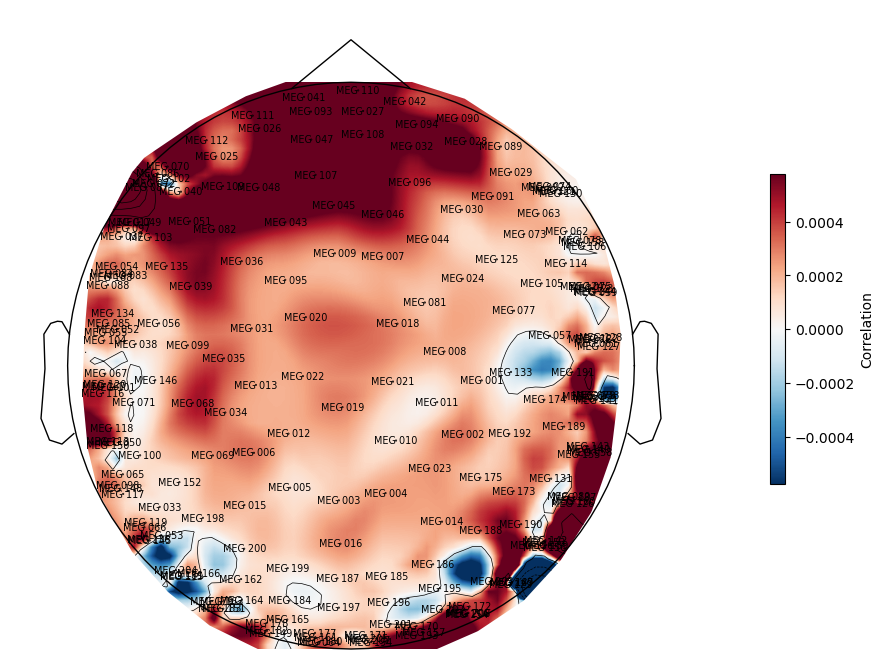

In [77]:
get_topomap(raw, get_mean_from_subjects_metrics(df_clip, "modified_r2", "alpha"), (-0.000576, 0.000576)) 

meg_channel_positions.shape:  (208, 2)
correlations.shape:  (208,)


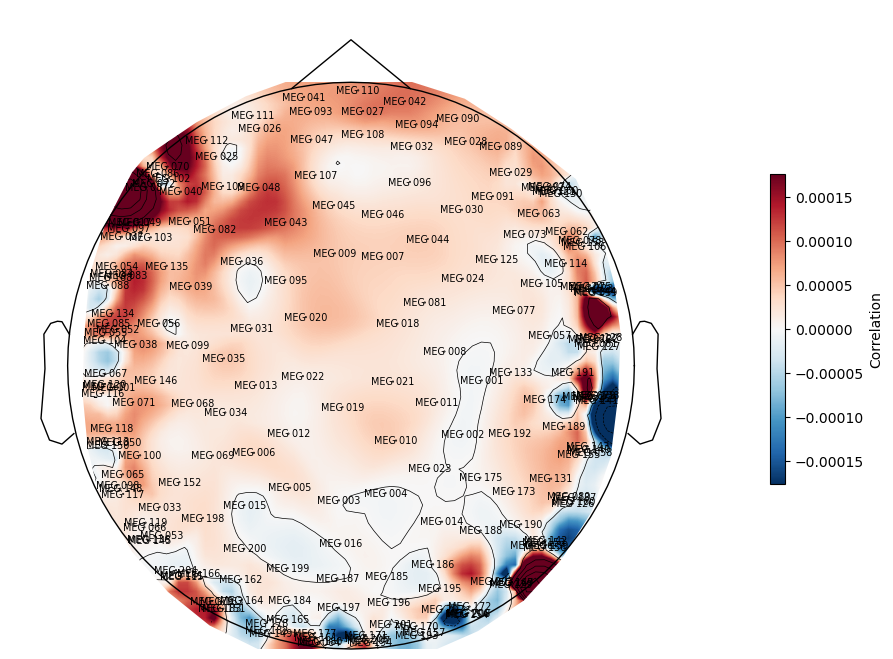

In [70]:
get_topomap(raw, get_mean_from_subjects_metrics(df_w2v, "modified_r2", "beta"), (-0.000176, 0.000176)) 